   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


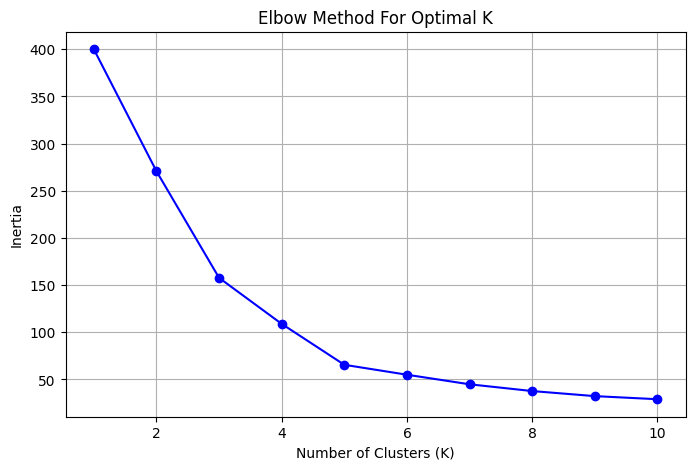

Silhouette Score: 0.55


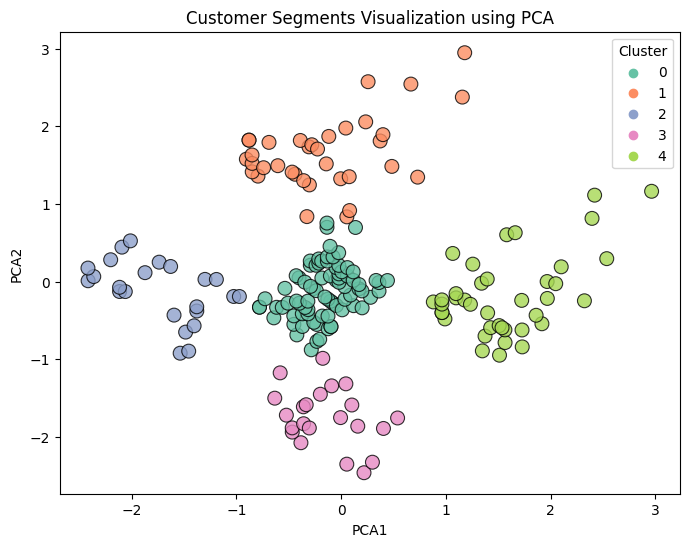

In [3]:
# ============================
# IMPORTS
# ============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ============================
# LOAD DATASET
# ============================
# Make sure the path is correct or use relative path
df = pd.read_csv("E:/t3/Mall_Customers.csv")  # Update path if needed
print(df.head())

# ============================
# CHECK FOR OUTPUT DIRECTORY
# ============================
os.makedirs("outputs", exist_ok=True)

# ============================
# DATA PREPROCESSING
# ============================
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================
# ELBOW METHOD TO FIND OPTIMAL K
# ============================
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.grid(True)
plt.savefig("outputs/elbow_plot.png")
plt.show()

# ============================
# FITTING KMEANS (Assuming K=5 from Elbow)
# ============================
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

# ============================
# SILHOUETTE SCORE
# ============================
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

# ============================
# PCA FOR VISUALIZATION
# ============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# ============================
# PLOT CLUSTERS
# ============================
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.8, edgecolor='k')
plt.title('Customer Segments Visualization using PCA')
plt.savefig("outputs/pca_2d_clusters.png")
plt.show()
